<div style="text-align: center; padding-top: 200px;">
    <h1><strong>Proyecto 2 Regresión Logística</strong></h1>
    <hr>
    <p style="font-size: 20px;">
        Max Gallardo<br>
        A01783128<br>
        Inteligencia Artificial Avanzada para la Ciencia de Datos I (TC3006C)<br>
        <strong>Profesor:</strong> Dr. Víctor de la Cueva<br>
        19.08.24
    </p>
    <div style="padding-top: 50px;">
        <img src="Tec%20de%20Monterrey%20Logo.png" alt="Tec de Monterrey Logo" style="width: 200px;"/>
    </div>
</div>

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;

## Introducción
En este ejercicio, se desarrolló un modelo de regresión logística para predecir la admisión de estudiantes a una institución educativa basándose en sus calificaciones en dos exámenes. El objetivo principal fue construir un clasificador binario que, dado un conjunto de datos con etiquetas (admitido/no admitido), pudiera predecir si un estudiante sería admitido o no basado en sus puntajes.

La regresión logística es un algoritmo de clasificación que calcula la probabilidad de que una observación pertenezca a una clase particular. Utiliza una función sigmoidal para mapear las combinaciones lineales de las características de entrada a un rango de 0 a 1. La hipótesis del modelo se ajusta mediante un proceso iterativo llamado gradiente descendente, que busca minimizar una función de costo.

## Código y resultados

### Importaciones

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as scaler

- `numpy`: Es una biblioteca fundamental para realizar operaciones numéricas en Python. La usamos para manejar arrays, realizar operaciones matemáticas, y manejar datos matriciales.

- `matplotlib.pyplot`: Es una biblioteca para crear gráficos en Python. La usamos para graficar los puntos de datos y la recta de decisión.

- `sklearn.preprocessing.StandardScaler`: Es una herramienta de la biblioteca scikit-learn que se utiliza para estandarizar las características. Esto significa que ajusta los datos para que tengan una media de 0 y una desviación estándar de 1, lo cual es útil en muchos algoritmos de aprendizaje automático, incluyendo la regresión logística.

### Graficar datos

In [145]:
def graficaDatos(X, y, theta=None):
    # Separar los ejemplos admitidos y no admitidos
    admitidos = y == 1
    no_admitidos = y == 0

    # Graficar los ejemplos sin normalización
    plt.scatter(X[admitidos, 0], X[admitidos, 1], c='blue', marker='x', label='Admitidos')
    plt.scatter(X[no_admitidos, 0], X[no_admitidos, 1], c='red', marker='o', label='No Admitidos')

    # Graficar la recta de decisión si se proporciona theta
    if theta is not None:
        # Graficar en la escala original (0 a 100)
        x_values = np.array([0, 100])
        # Desnormalizar theta para graficar correctamente
        theta_0 = theta[0] - np.sum((theta[1:] * scaler.mean_) / scaler.scale_)
        theta_1 = theta[1] / scaler.scale_[0]
        theta_2 = theta[2] / scaler.scale_[1]
        y_values = -(theta_0 + theta_1 * x_values) / theta_2
        plt.plot(x_values, y_values, label='Límite de decisión')

    # Configuración de la gráfica
    plt.xlim(0, 100)  # Limitar el eje X de 0 a 100
    plt.ylim(0, 100)  # Limitar el eje Y de 0 a 100
    plt.xlabel('Examen 1')
    plt.ylabel('Examen 2')
    plt.legend()
    plt.show()

- Grafica los datos (calificaciones de exámenes) y, si se proporciona, también la recta de decisión calculada por el modelo de regresión logística.

- Separa los datos en admitidos y no admitidos, los grafica con diferentes marcadores ("X" y "O"), y calcula la recta de decisión para mostrarla en el gráfico.

### Ecuación sigmoidal

In [146]:
def sigmoidal(z):
    return 1 / (1 + np.exp(-z))

- Calcula la función sigmoidal, que convierte cualquier valor en una probabilidad entre 0 y 1.

- Convierte el valor de entrada (que generalmente es un producto punto entre las características y los parámetros) en una probabilidad.

In [147]:
def funcionCosto(theta, X, y):
    m = len(y)
    h = sigmoidal(np.dot(X, theta))
    J = -(1/m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
    grad = (1/m) * np.dot(X.T, (h - y))
    return J, grad

- Calcula el costo (qué tan bien se está ajustando el modelo) y el gradiente (la dirección para ajustar los parámetros) en regresión logística.

- Mide qué tan lejos está la predicción del modelo de las etiquetas reales y calcula cómo deben ajustarse los parámetros  𝜃 para mejorar la predicción.

### Función de aprendizaje

In [148]:
def aprende(theta, X, y, iteraciones, alpha):
    for i in range(iteraciones):
        J, grad = funcionCosto(theta, X, y)
        theta -= alpha * grad
    return theta

- Implementa el algoritmo de gradiente descendente para ajustar los parámetros  𝜃 y minimizar el costo.

- Itera varias veces, ajustando los parámetros 𝜃 gradualmente para encontrar los valores que minimizan el costo, utilizando la tasa de aprendizaje 𝛼.

### Función de predicción

In [149]:
def predice(theta, X):
    probabilidad = sigmoidal(np.dot(X, theta))
    return (probabilidad >= 0.5).astype(int)

- Predice la clase (0 o 1) de nuevas instancias basándose en los parámetros 𝜃 aprendidos.
-  Calcula la probabilidad de que una instancia pertenezca a la clase 1, y clasifica en 0 o 1 dependiendo si la probabilidad es menor o mayor a 0.5.

### Código de prueba

Theta óptimo: [0.46725478 1.285726   1.15288545]


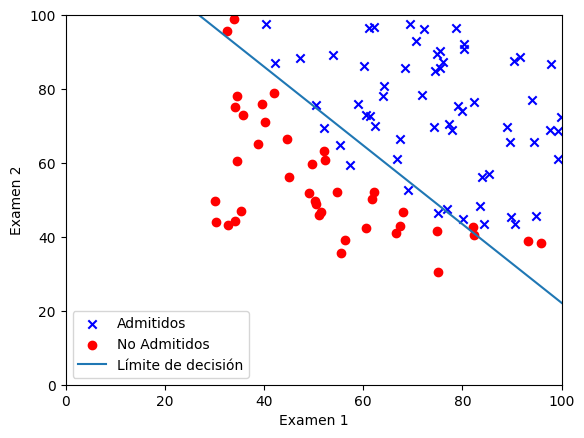

Predicción para el nuevo estudiante: Admitido


In [150]:
# Cargar los datos
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, 0:2]  # No normalizar estos datos para graficar
y = data[:, 2]

# Mantener una copia de los datos originales para graficar
X_original = X.copy()

# Normalizar características para el entrenamiento (excluyendo la columna de 1's)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Agregar columna de 1's a X para el entrenamiento
m = X.shape[0]
X = np.concatenate([np.ones((m, 1)), X], axis=1)

# Inicializar theta
theta = np.zeros(X.shape[1])

# Definir parámetros
iteraciones = 10000  # Aumentar el número de iteraciones
alpha = 0.001  # Ajustar la tasa de aprendizaje

# Entrenar el modelo
theta_optimo = aprende(theta, X, y, iteraciones, alpha)

# Mostrar theta óptimo
print(f'Theta óptimo: {theta_optimo}')

# Graficar datos y recta de decisión utilizando los datos originales
graficaDatos(X_original, y, theta_optimo)

# Predicción para un nuevo estudiante (usamos el modelo entrenado con datos normalizados)
nuevo_estudiante = np.array([45, 85])
nuevo_estudiante_norm = scaler.transform([nuevo_estudiante])
nuevo_estudiante_norm = np.concatenate([np.ones(1), nuevo_estudiante_norm[0]])

prediccion = predice(theta_optimo, nuevo_estudiante_norm)
print(f'Predicción para el nuevo estudiante: {"Admitido" if prediccion == 1 else "No Admitido"}')

### Hallazgos 

- **Interpretación Visual del Límite de Decisión**:
   - En la imagen proporcionada, la línea de decisión resultante del modelo separa razonablemente bien las clases de admitidos y no admitidos. Se observa que la mayoría de los puntos etiquetados como admitidos (`X` azules) están por encima de la línea, mientras que la mayoría de los puntos etiquetados como no admitidos (`O` rojos) están por debajo de la línea.

   - Sin embargo, algunos puntos están mal clasificados, lo que sugiere que, aunque el modelo ha encontrado un límite de decisión razonable, no es perfecto. Esto es de esperarse en la mayoría de los modelos lineales cuando los datos no son perfectamente linealmente separables.

- **Theta Óptimo**:
   - Los valores de $(\theta)$ obtenidos son `[0.46725478, 1.285726, 1.15288545]`. Estos coeficientes reflejan la influencia de las calificaciones de los exámenes en la decisión de admisión.

   - Un valor positivo en $(\theta_1)$ y $(\theta_2)$ indica que a medida que las calificaciones en los exámenes aumentan, la probabilidad de ser admitido también aumenta. El \(\theta_0\) representa el término de sesgo (intersección) que ajusta la predicción hacia una clase u otra.
   
- **Predicción Correcta para un Nuevo Estudiante**:
   - La predicción para un nuevo estudiante con calificaciones de 45 en el Examen 1 y 85 en el Examen 2 resultó en "Admitido". Esta predicción es coherente con la visualización, ya que estos puntajes caen en la región por encima de la línea de decisión, donde la mayoría de los estudiantes han sido admitidos.

### Conclusiones

- **Eficiencia del Modelo**:
   - La línea de decisión calculada por el modelo funciona adecuadamente para clasificar a la mayoría de los estudiantes de manera correcta. Sin embargo, la presencia de algunos errores de clasificación sugiere que hay límites en la capacidad de un modelo lineal simple para capturar toda la variabilidad en los datos.

   - Para mejorar la precisión, podría ser útil explorar modelos más complejos, como la regresión logística con características polinómicas o incluso técnicas de aprendizaje más avanzadas.

- **Robustez de la Regresión Logística**:
   - La predicción correcta para un nuevo estudiante indica que, a pesar de algunas limitaciones, el modelo de regresión logística es bastante robusto en la clasificación de estudiantes dentro de este dominio.
   
   - Sin embargo, es importante destacar que para casos donde los datos muestran mayor complejidad o no son linealmente separables, la regresión logística lineal puede no ser suficiente.

- **Próximos Pasos**:
   - Para abordar las limitaciones observadas, se podrían considerar enfoques adicionales, como la incorporación de características adicionales, el uso de métodos de regularización para evitar sobreajuste o la implementación de modelos no lineales que pueden manejar mejor la complejidad de los datos.

En resumen, la visualización del límite de decisión junto con los valores de $(\theta)$ óptimos y la predicción para un nuevo estudiante refuerzan la efectividad del modelo, pero también subrayan las áreas donde podría beneficiarse de mejoras adicionales.